In [15]:
import numpy as np

lc = np.genfromtxt("data/PG1302_CRTS.dat", names="mjd, mag, magerr", delimiter=",", skip_header=1)
t = lc["mjd"] - 53496
mag = lc["mag"]
magerr = lc['magerr']

m = np.vstack((t, mag)).T

#print(str(m[:10]))
np.savetxt("data/PG1302_CRTS_REDFIT.dat", m, delimiter="\t")


              Freq           Gxx      Gxx_corr       Gred_th          Gred  \
count  1450.000000  1.450000e+03   1450.000000  1.450000e+03  1.450000e+03   
mean      0.024508  7.503397e-01     13.624069  7.503400e-01  7.503397e-01   
std       0.014164  1.539919e+00    489.059571  2.476652e-14  6.383482e-02   
min       0.000000  2.859380e-09      0.000358  7.503400e-01  1.152050e-13   
25%       0.012254  1.569477e-01      0.161467  7.503400e-01  7.453175e-01   
50%       0.024508  3.913570e-01      0.391302  7.503400e-01  7.598395e-01   
75%       0.036762  8.367670e-01      0.842060  7.503400e-01  7.731672e-01   
max       0.049016  1.665310e+01  18623.500000  7.503400e-01  8.187000e-01   

            CorrFac    80pct_Chi2    90pct_Chi2    95pct_Chi2    99pct_Chi2  \
count  1.450000e+03  1.450000e+03  1.450000e+03  1.450000e+03  1.450000e+03   
mean   1.000000e+00  1.207900e+00  1.727410e+00  2.248350e+00  3.454820e+00   
std    8.507457e-02  4.264727e-14  2.709879e-14  3.998182e-1

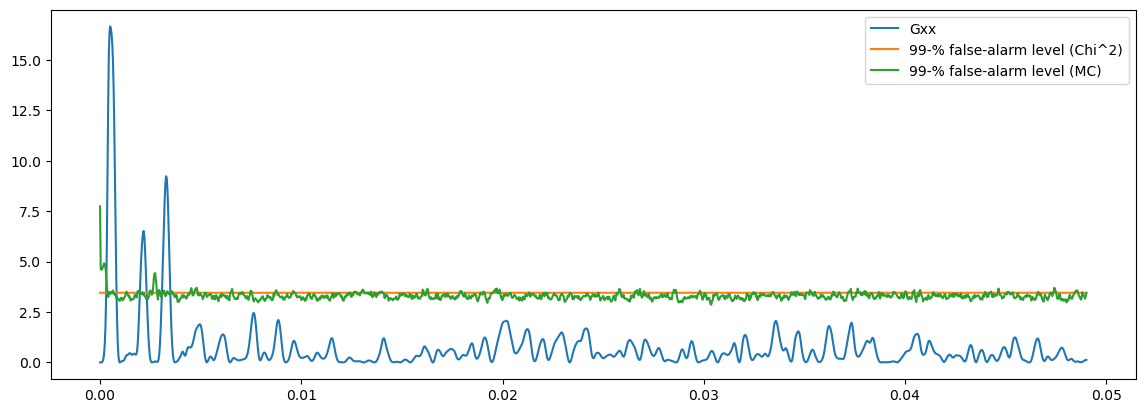

In [55]:
import matplotlib.pyplot as plt
import pandas as pd

analysis = np.genfromtxt("PG1302_CRTS-ofac10.red", names="Freq, Gxx, Gxx_corr, Gred_th, Gred, CorrFac, 80pct_Chi2, 90pct_Chi2, 95pct_Chi2, 99pct_Chi2, 80pct_MC, 90pct_MC, 95pct_MC, 99pct_MC", delimiter="  ", skip_header=50)
#print(str(analysis[:10]))
print(pd.DataFrame(analysis.flatten()).describe())
freq = analysis["Freq"]
gxx = analysis["Gxx"]
k = np.unravel_index(np.argmax(gxx), gxx.shape)
print('Strongest signal: {0:.4f}'.format(gxx[k]))
print('at freq(1/d):     {0:.4f}'.format(freq[k]))
print('at period(d):     {0:.4f}'.format(1/freq[k]))

plt.figure().set_figwidth(14)
plt.plot(analysis["Freq"], analysis["Gxx"], label="Gxx")
#plt.plot(analysis["Freq"], analysis["Gxx_corr"], label="Gxx_corr")
plt.plot(analysis["Freq"], analysis["99pct_Chi2"], label="99-% false-alarm level (Chi^2)")
plt.plot(analysis["Freq"], analysis["99pct_MC"], label="99-% false-alarm level (MC)")
plt.legend()

plt.show()